In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #

In [2]:
# 导入数据
edge_df = pd.read_csv('data/the-marvel-universe-social-network/edges.csv') # Edges
hero_net_df = pd.read_csv('data/the-marvel-universe-social-network/hero-network.csv') # Hero
node_df = pd.read_csv('data/the-marvel-universe-social-network/nodes.csv') # Nodes

In [3]:
# 探索漫画卷数和人物数量
print('漫画卷数',len(node_df[node_df['type'] == 'comic']))
print('人物数量',len(node_df[node_df['type'] == 'hero']))

漫画卷数 12651
人物数量 6439


In [4]:
# 数据初探
display(edge_df.head())
display(hero_net_df.head())
display(node_df.head())

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [5]:
# 数据预处理转化
temp = pd.DataFrame({'edges.csv':sorted([h for h in edge_df['hero'].unique() if 'SPIDER' in h]),
                     'hero-network.csv':sorted([h for h in hero_net_df['hero1'].unique() if 'SPIDER' in h])})

display(temp)

for c in ['hero1', 'hero2']:
    print(f"{c} name max in hero-network.csv : {max(hero_net_df[c].apply(lambda x : len(x)))}")
    

# Name Preprocessing
## only use len 20 & only use left string bas on "/"
for c in ['hero1', 'hero2']:
    hero_net_df[c] = hero_net_df[c].apply(lambda x : x[:20].split("/")[0])
edge_df['hero'] = edge_df['hero'].apply(lambda x : x[:20].split("/")[0])

,edges.csv,hero-network.csv
0,"BEACH, SPIDER","BEACH, SPIDER"
1,BLOOD SPIDER/,BLOOD SPIDER/
2,MAN-SPIDER CLONE | M,MAN-SPIDER CLONE | M
3,MAN-SPIDER | MUTANT,MAN-SPIDER | MUTANT
4,SPIDER-MAN CLONE/BEN,SPIDER-MAN CLONE/BEN
5,SPIDER-MAN III/MARTH,SPIDER-MAN III/MARTH
6,SPIDER-MAN/PETER PARKER,SPIDER-MAN/PETER PAR
7,SPIDER-WOMAN DOPPELG,SPIDER-WOMAN DOPPELG
8,SPIDER-WOMAN II/JULI,SPIDER-WOMAN II/JULI
9,SPIDER-WOMAN IV/CHAR,SPIDER-WOMAN IV/CHAR


hero1 name max in hero-network.csv : 20
hero2 name max in hero-network.csv : 20


In [6]:
# 验证
print("SPIDER & HULK in hero-network.csv")
print(f"hero1=SPIDER-MAN, hero2=HULK : {len(hero_net_df[(hero_net_df['hero1']=='SPIDER-MAN')&(hero_net_df['hero2']=='HULK')])}")
print(f"hero1=HULK, hero2=SPIDER-MAN : {len(hero_net_df[(hero_net_df['hero2']=='SPIDER-MAN')&(hero_net_df['hero1']=='HULK')])}")

temp1 = set(edge_df[edge_df['hero']=='SPIDER-MAN']['comic'])
temp2 = set(edge_df[edge_df['hero']=='HULK']['comic'])
print(f"Intersection in edges.csv : {len(temp1.intersection(temp2))}")

SPIDER & HULK in hero-network.csv
hero1=SPIDER-MAN, hero2=HULK : 43
hero1=HULK, hero2=SPIDER-MAN : 50
Intersection in edges.csv : 93


In [37]:
# 构建全体节点数据集
marvel_net_full = nx.Graph() 
for i, row in hero_net_df.iterrows():
    marvel_net_full.add_edge(row['hero1'], row['hero2'])  
# 只需运行到这里就可以了

In [8]:
# 输出网络拓扑性质
G = marvel_net_full
node_count = len(G.nodes)
print("节点数量：", node_count)
edge_count = len(G.edges)
print("边数量：", edge_count)
connected_components = nx.number_connected_components(G)
print("连通片数量：", connected_components)
density = nx.density(G)
print("网络密度：", density)
clustering_coefficient = nx.average_clustering(G)
print("网络的聚类系数：", clustering_coefficient)
average_degree = sum(dict(G.degree()).values()) / len(G)
print("平均度：", average_degree)
average_neighbor_degree = nx.average_neighbor_degree(G)
average_clustering_degree = nx.average_clustering(G)
average_redundancy = sum(average_neighbor_degree.values()) / len(average_neighbor_degree) - average_clustering_degree
print("平均余度：", average_redundancy)
degree_assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print("度相关系数：", degree_assortativity_coefficient)

节点数量： 6418
边数量： 167203
连通片数量： 4
网络密度： 0.008119743477041958
网络的聚类系数： 0.7743922455957101
平均度： 52.10439389217825
平均余度： 333.616628774077
度相关系数： -0.16200719989165444


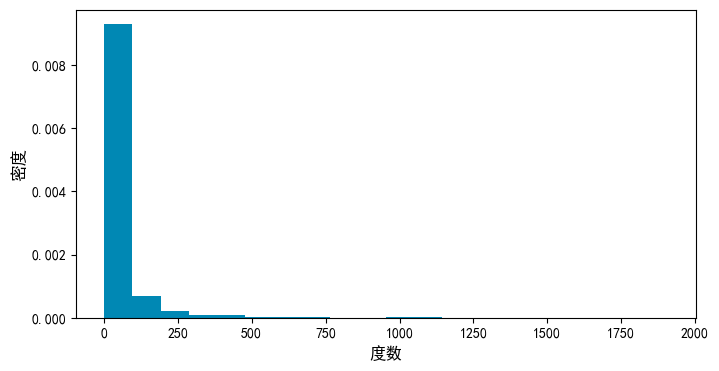

In [11]:
# 自定义配色方案
colors = ['#0088b4']

G_D = pd.DataFrame(G.degree())  # 将展示形式变为Dataframe
G_D.columns = ['node', 'degree']  # 重命名列名，默认为0，1

plt.figure(figsize=(8, 4))  # 设置图形大小

plt.hist(G_D['degree'], density=True, bins=20, color=colors)  # 绘制直方图，设置密度为True，分为40个箱子，使用自定义配色方案

# 添加x轴和y轴标签
plt.xlabel('度数', fontsize=12)
plt.ylabel('密度', fontsize=12)

plt.tick_params(axis='both', which='both', labelsize=10)  # 调整刻度标签的字体大小

plt.show()  # 显示图形

In [87]:
# 美国队长的度和某个小垃圾的度
# 查询美国队长的度
degree = G.degree('CAPTAIN AMERICA')
print("美国队长的度为:", degree)


degree2 = G.degree('TAKU')
print("TAKU的度为:", degree2)

美国队长的度为: 1908
TAKU的度为: 38


In [69]:
df = pd.DataFrame(columns=["节点数量","边数量","连通片数量", "网络密度", "平均最短路径长度", "网络直径", "网络的聚类系数", "平均度", "平均余度", "度相关系数"])
df.loc[0] = [node_count, edge_count, connected_components, density, '-' , 'inf', clustering_coefficient, average_degree, average_redundancy, degree_assortativity_coefficient]

# 将 DataFrame 写入 CSV 文件
# df.to_excel("topology_metrics.xlsx", index=False)

In [14]:
# 局部相似性
import networkx as nx
import pandas as pd
import math

def recommend_friends(G, node):
    scores = []
    neighbors = list(G.neighbors(node))
    
    for n in G.nodes():
        if n == node or G.has_edge(node, n):
            continue
        
        score = sum(1 / math.log(G.degree(neighbor)) for neighbor in nx.common_neighbors(G, node, n))
        scores.append((n, score))
    
    scores.sort(key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(scores, columns=['Friend', 'Adamic-Adar'])
    
    return df


node = 'IRON MAN'
recommended_friends_df = recommend_friends(G, node)
print(recommended_friends_df)
#recommended_friends_df.to_excel('recommended_friends_df.xlsx',index = False)

                Friend  Adamic-Adar
0              BANSHEE    42.698611
1       THUNDERBIRD II    32.870589
2            BLACK CAT    27.849381
3                SIRYN    25.387650
4     COUNTERWEIGHT II    24.478196
...                ...          ...
4890              SHOT     0.000000
4891          STAMPEDE     0.000000
4892         BOMBADIER     0.000000
4893             CLASH     0.000000
4894           CORDITE     0.000000

[4895 rows x 2 columns]


In [18]:
A=nx.adjacency_matrix(G)
AA = (A*A).todense()
print('矩阵形状为',AA.shape)
print(AA)

C:\Users\sty007\AppData\Local\Temp\ipykernel_4844\3367566985.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(G)


矩阵形状为 (6418, 6418)
[[ 22  10   9 ...   0   0   0]
 [ 10  11   6 ...   0   0   0]
 [  9   6 711 ...   3   5   5]
 ...
 [  0   0   3 ...  10   2   2]
 [  0   0   5 ...   2  11   9]
 [  0   0   5 ...   2   9  10]]


In [7]:
import networkx as nx
import pandas as pd

G = marvel_net_full
def recommend_friends(G, node):
    pr = nx.pagerank_numpy(G)
    pr_sorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(pr_sorted, columns=['Friend', 'PageRank'])
    
    return df
node = 'IRON MAN'
recommended_friends_df_2 = recommend_friends(G, node)
print(recommended_friends_df_2)

# recommended_friends_df_2.to_excel('recommended_friends_df_2.xlsx',index = False)

C:\Users\sty007\AppData\Local\Temp\ipykernel_22440\473018456.py:6: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pr = nx.pagerank_numpy(G)
d:\Applications\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


                Friend  PageRank
0           SPIDER-MAN  0.005297
1      CAPTAIN AMERICA  0.005134
2             IRON MAN  0.004125
3            WOLVERINE  0.003872
4                THING  0.003687
...                ...       ...
6413        FIREFLY II  0.000025
6414             HO TI  0.000025
6415  KURLYCHEK, PATTY  0.000025
6416        STAR THIEF  0.000025
6417     STERLING, SID  0.000025

[6418 rows x 2 columns]


#### 社区发现

In [8]:
import time
G = marvel_net_full

In [14]:
#1.Q贪婪
from networkx.algorithms.community import greedy_modularity_communities

#计时计算
start_time = time.time()    
c = greedy_modularity_communities(G)
end_time = time.time()
t1 = end_time - start_time

#输出
print(type(c)) #返回类型是list
[print(str(_)+'\n======') for _ in list(c)]# 展示社团划分结果

<class 'list'>
frozenset({'GIGANTO', 'ZAPPER, DAN', 'SLITHER', 'CHESNEY, SANFORD', 'PAST MASTER', 'MASTER', 'PHOBOS', 'DROMEDAN', 'TEFRAL', 'FER DE LANCE', 'VINDIKTOR', 'ATOM SMASHER', 'TRAPSTER', 'MR. FANTASTIC DOPPEL', 'SVAROG', 'CAPTAIN MARVEL', 'REAGAN, NANCY', 'MASTERS, ALICIA REIS', 'NOX', 'DEMITRIUS', 'JUDGE KRAY-TOR', 'MINERVA [KREE]', 'RICHARDS, FRANKLINK ', 'COBRA', 'BLACKWOOD, JENNY', 'FREDERICKS, GENERAL', 'SUAREZ, RAPHAEL', 'ULTIMATOR', 'BLOODAXE', 'MROTH', 'SUPREME INTELLIGENCE', 'ALIOTH', 'FEAR EATER', 'UNDERTOW', 'WOLMAN, GIDEON', 'ARBOGAST, BAMBI', 'GRIFFIN II', 'FATHER TIME', 'JONES, MARLO CHANDLE', 'CONTROLLER', 'SIBERCAT', 'GYRICH, HENRY PETER', 'STORM DOPPELGANGER I', 'DEPALMA, MR.', 'NOMAD II', 'SISTER AGONY', 'HESCAMAR', 'LUCIFER', 'FANG', 'ENCHANTER', 'CHATTERTON, DAVE', 'COTTONMOUTH II', 'NASH, SABRINA', 'ATTUMA', 'RENKO, DR. IRENO', 'TARNOK-KOL', 'FIRELORD', 'DR. SPECTRUM III', 'SPLICE II', 'PRINCESS PYTHON', 'ARABIAN KNIGHT', 'DEATH ADDER', 'WINDSHEAR', 'CART

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
# 2.louvain算法
import community

#计时计算
start_time = time.time()
partition = community.best_partition(G) # compute communities
end_time = time.time()
t2 = end_time - start_time


print(type(partition)) #返回类型是list
print(partition)

<class 'dict'>
{'LITTLE, ABNER': 0, 'PRINCESS ZANDA': 1, 'BLACK PANTHER': 2, 'STEELE, SIMON': 3, 'FORTUNE, DOMINIC': 3, 'ERWIN, CLYTEMNESTRA': 4, 'IRON MAN': 0, 'IRON MAN IV': 0, 'RAVEN, SABBATH II': 3, 'CARNIVORE': 0, 'GHOST': 3, 'ZIMMER, ABE': 0, 'FU MANCHU': 3, 'TARR, BLACK JACK': 3, 'SMITH, SIR DENIS NAY': 3, 'SHANG-CHI': 3, 'STARSHINE II': 6, 'ROM, SPACEKNIGHT': 2, 'MAN-THING': 5, 'WU, LEIKO': 3, 'DOCTOR DREDD': 3, 'RESTON, CLIVE': 3, 'JACKSON, STEVE': 6, 'MYSTIQUE': 5, 'BLOB': 5, 'TORPEDO III': 2, 'PYRO': 5, 'AVALANCHE': 5, 'ROGUE ': 5, 'DESTINY II': 5, 'HYBRID': 5, 'CLARK, SARAH': 6, 'KILLBURN, MACK': 6, 'JONES, TAMMY ANNE': 6, 'JONES, LORRAINE LORR': 6, 'JONES, NELL': 6, 'JONES, DANIEL DANNY': 6, 'CLARK, JOHN': 6, 'SUB-MARINER': 2, 'VASHTI': 2, 'SEAWEED MAN': 2, 'NOVA': 6, 'FIRESTAR': 6, 'THUNDERBALL': 1, 'NAMORITA': 6, 'SPEEDBALL': 6, 'HULK': 2, 'NIGHT THRASHER': 6, 'SPIDER-MAN': 3, 'JUSTICE II': 6, 'TIGRA': 2, 'WASP': 2, 'GALACTUS': 2, 'MOCKINGBIRD': 2, 'SILVER SURFER': 2, 'H

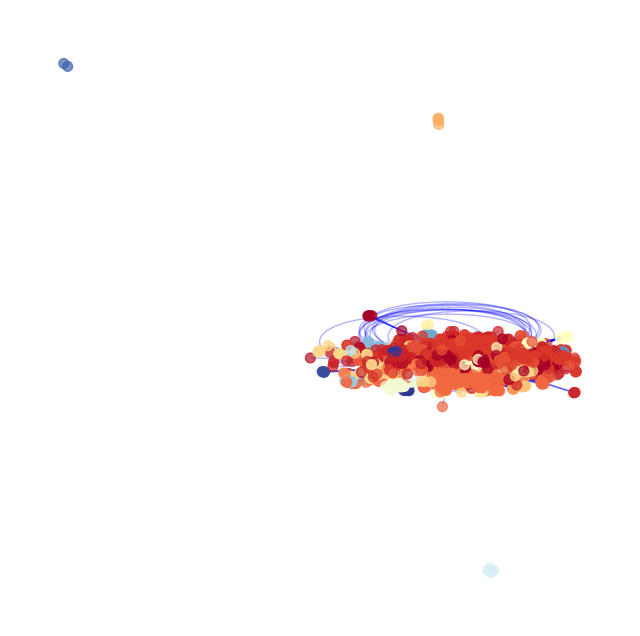

In [12]:
# 2.可视化
# 设置绘图参数
node_size = 50  # 设置节点大小
node_color = 'red'  # 设置节点颜色
edge_color = 'blue'  # 设置边的颜色
width = 1.0  # 设置边的宽度
font_size = 10  # 设置标签字体的大小
font_color = 'black'  # 设置标签字体的颜色
pos = nx.spring_layout(G)  # 设置节点位置布局
plt.figure(figsize=(8, 8)) # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, alpha=0.7,node_size=node_size, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3,edge_color=edge_color, width=width)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels,font_size=font_size, font_color=font_color)

plt.savefig('bcsj_louvain_visualize.png',dpi=500)
plt.show(G)

In [13]:
from sklearn.cluster import KMeans
# 3.K_means 划分
A = pd.DataFrame(nx.adjacency_matrix(G).todense())
node_list = list(G.nodes)

#计时计算
start_time = time.time()
# k均值聚类法
kmeans = KMeans(n_clusters=4, random_state=2018)
# 训练聚类模型
kmeans.fit(A)
# 聚类结果
y = kmeans.predict(A)

end_time = time.time()
t3 = end_time - start_time


C:\Users\sty007\AppData\Local\Temp\ipykernel_8016\3218785698.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = pd.DataFrame(nx.adjacency_matrix(G).todense())


In [ ]:
print('Q贪婪函数运行时间:',t1,'秒')
print('Louvain运行时间:',t2,'秒')
print('Kmeans运行时间:',t3,'秒')

#### 网络传播动力学

In [25]:
#选择一个模型
import ndlib
import ndlib.models.epidemics as ep
model = ep.SIRModel(G)
#模型中数值对应的个体类别
print(model.available_statuses)
#模型参数 （对于不同模型需要配置的参数有所区别）
import ndlib.models.ModelConfig as mc
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01) # initial percentage of infected nodes
model.set_initial_status(cfg)

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}


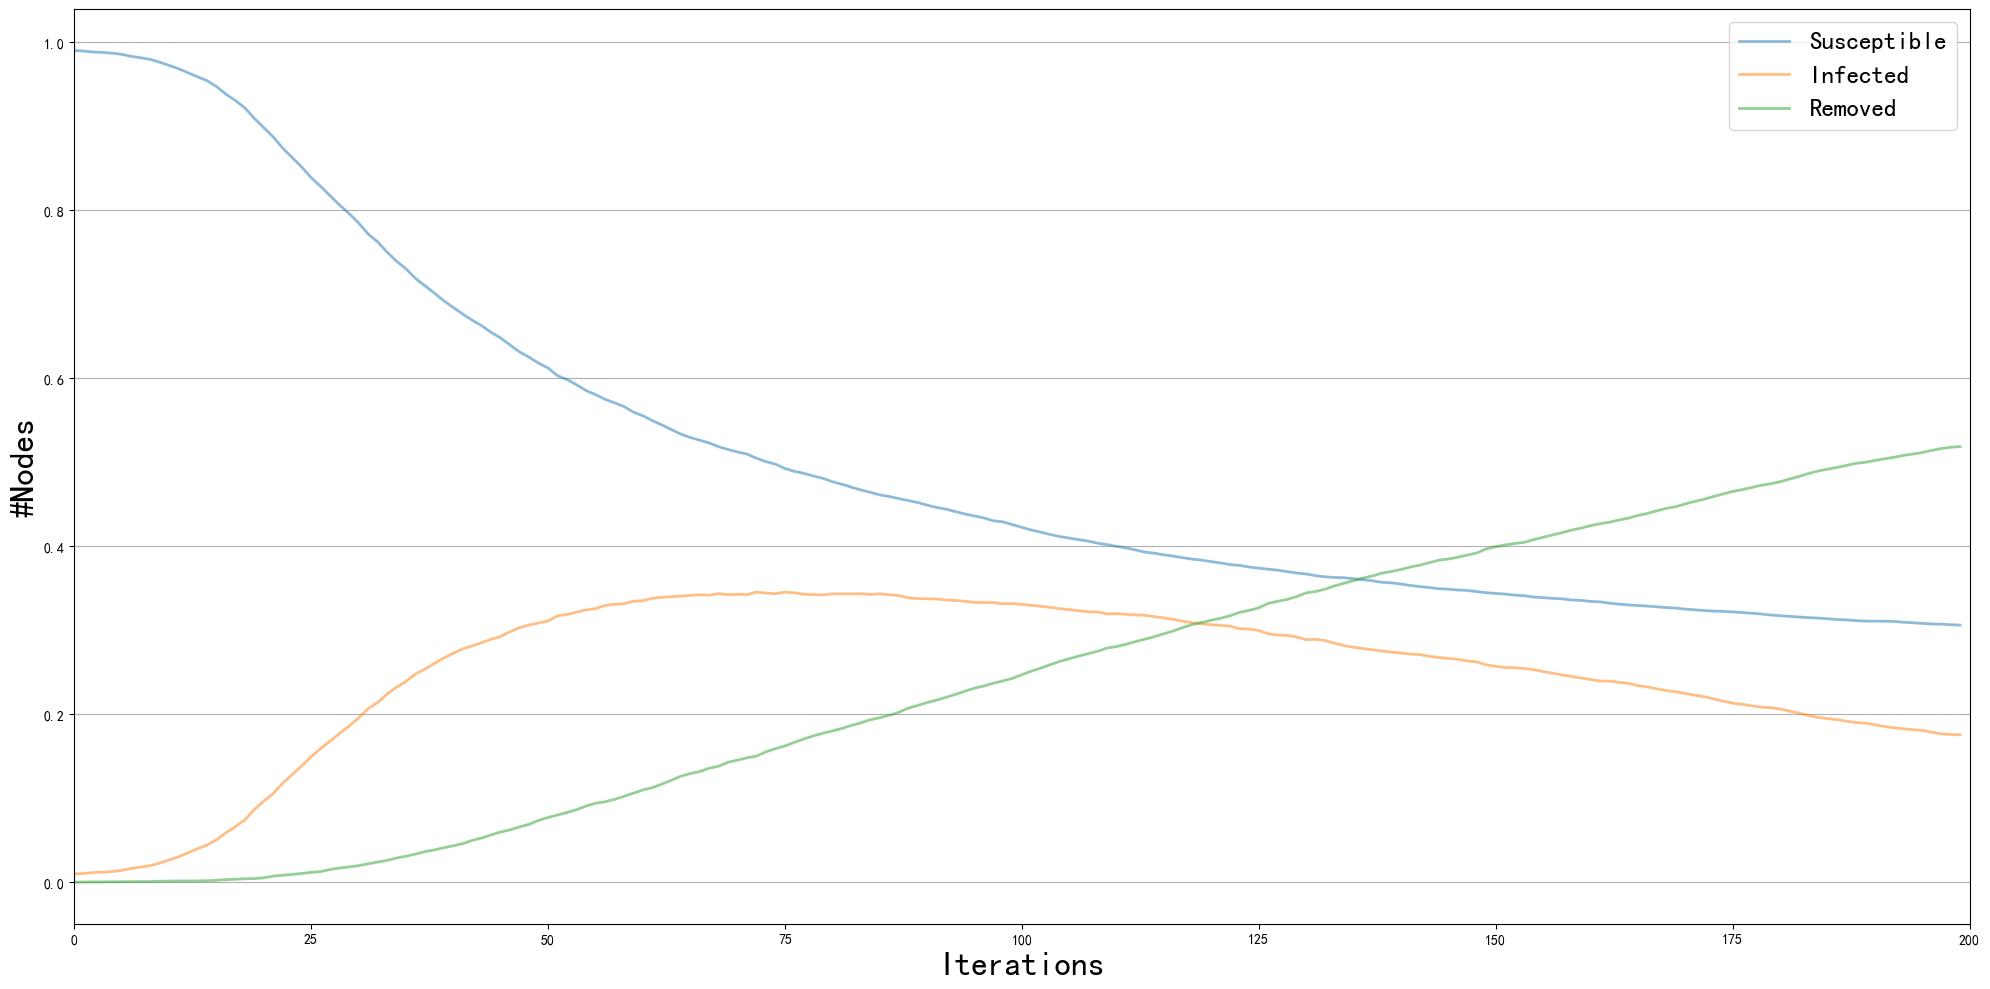

In [26]:
# 传播的时间（迭代次数）
iterations = model.iteration_bunch(200, node_status=True)
# 传播的趋势（每次迭代后的传播结果）
trends = model.build_trends(iterations)
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()


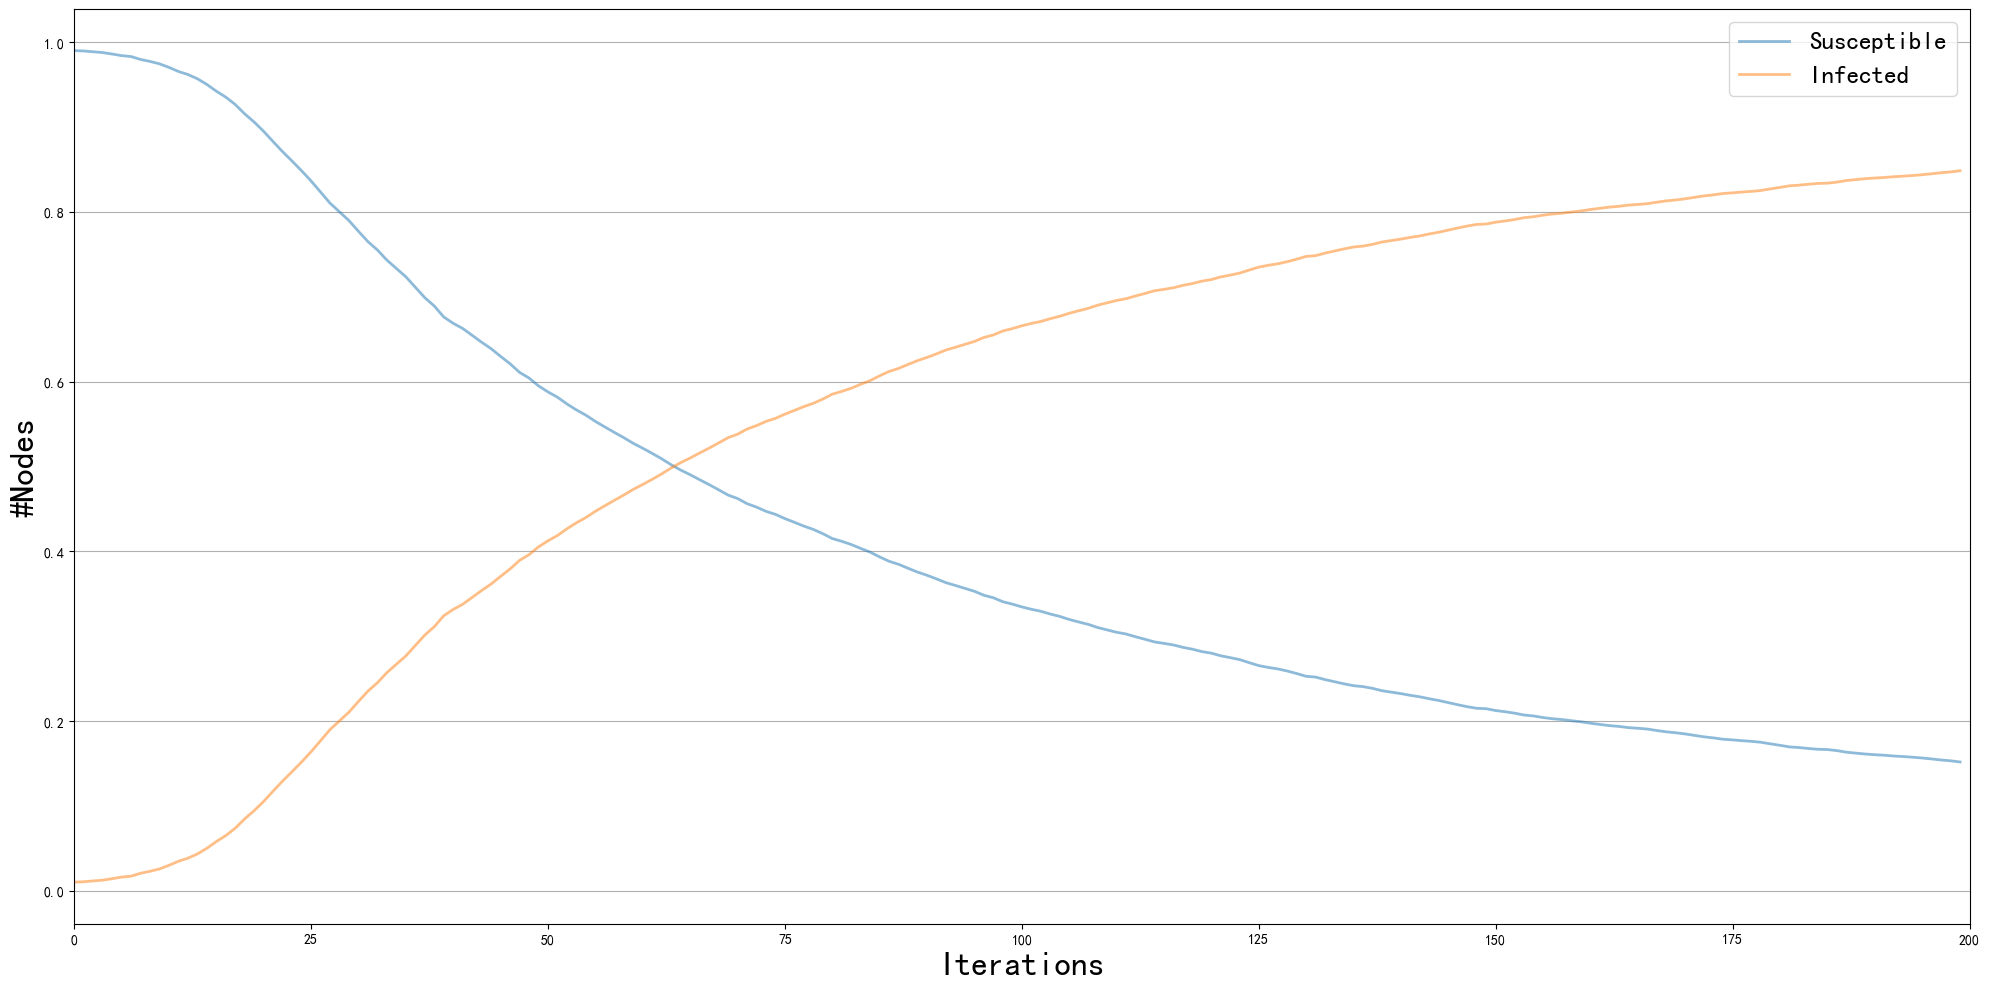

In [28]:
#SI模型的传播过程及结果
model_si = ep.SIModel(G)
cfg_si = mc.Configuration()
cfg_si.add_model_parameter('beta', 0.001)
cfg_si.add_model_parameter("percentage_infected", 0.01)
model_si.set_initial_status(cfg_si)
iterations_si = model_si.iteration_bunch(200, node_status=True)
trends_si = model_si.build_trends(iterations_si)
#from ndlib.utils import multi_runs
#trends1 = multi_runs(model1, execution_number=10, iteration_number=100, nprocesses=4)
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_si, trends_si)
viz.plot()


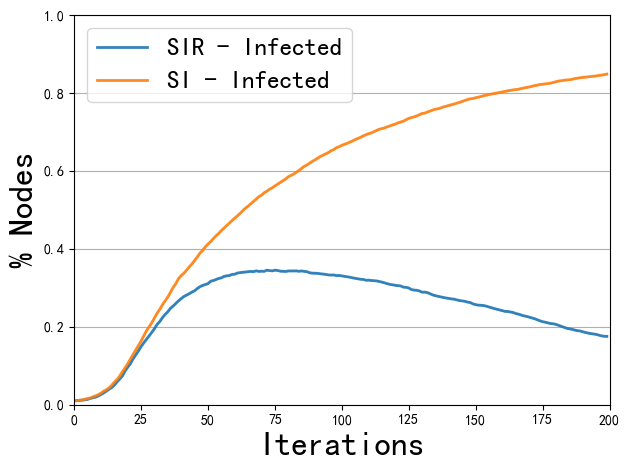

In [29]:
#对比SI和SIR的传播过程和结果
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model_si], [trends, trends_si], statuses=['Infected'])
viz.plot()

In [41]:
import ndlib.models.opinions as op
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
import networkx as nx
g = nx.barabasi_albert_graph(1000,100)
# Algorithmic Bias model
model = op.AlgorithmicBiasModel(g)
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.3)
config.add_model_parameter("gamma", 5)
model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(100)
viz = OpinionEvolution(model, iterations)
viz.plot()
#viz.savefig("image4.jpg",dpi=500,bbox_inches = 'tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
input = '叶文洁'
words = ['基地', '大兴安岭', '红岸基地', '杨卫宁', '这天']
similarities = [0.8850860731141718, 0.8751939702972178, 0.736888878503559, 0.716228264494318, 0.7011499984886618]

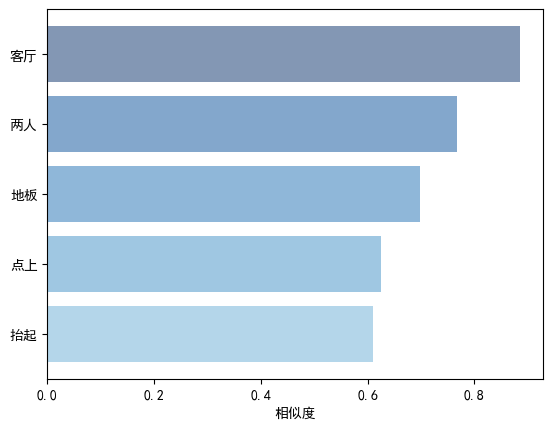

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #

input = '丁仪'
words = ['客厅', '两人', '地板', '点上', '抬起']
similarities = [0.8852704127574261, 0.7676858035394106, 0.6982972487551756, 0.6255579520098448, 0.6095579107524128]

# 逆序排列相似度和词语列表
words = list(reversed(words))
similarities = list(reversed(similarities))

colors = plt.cm.Blues(np.linspace(0.5, 1, len(words)))

plt.barh(range(len(words)), similarities, color=colors, alpha=0.5)  # 调整透明度为0.7

plt.yticks(range(len(words)), words)
plt.xlabel('相似度')

plt.savefig('yyx_report/figures/'+input + '词袋模型.png',dpi=500)
plt.show()



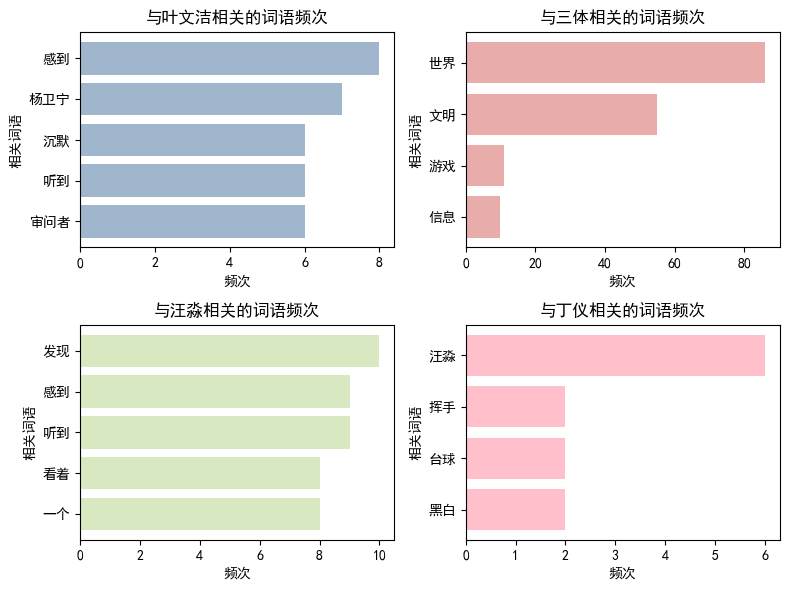

In [35]:
data = {
    '叶文洁': {'感到': 8, '杨卫宁': 7, '沉默': 6, '听到': 6, '审问者': 6},
    '三体': {'世界': 86, '文明': 55, '游戏': 11, '信息': 10},
    '汪淼': {'发现': 10, '感到': 9, '听到': 9, '看着': 8, '一个': 8},
    '丁仪': {'汪淼': 6, '挥手': 2, '台球': 2, '黑白': 2}
}

inputs = ['叶文洁', '三体', '汪淼', '丁仪']

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

colors = ['#9FB6CD', '#E8ADAA', '#D8E9C2', '#FFC0CB']

for i, input_word in enumerate(inputs):
    sorted_data = sorted(data[input_word].items(), key=lambda x: x[1], reverse=True)
    labels, values = zip(*sorted_data)

    row = i // 2
    col = i % 2

    axs[row, col].barh(labels, values, color=colors[i])
    axs[row, col].invert_yaxis()  # 反转y轴，使条形图按降序排列

    axs[row, col].set_xlabel('频次')
    axs[row, col].set_ylabel('相关词语')
    axs[row, col].set_title('与{}相关的词语频次'.format(input_word))

plt.tight_layout()
plt.show()

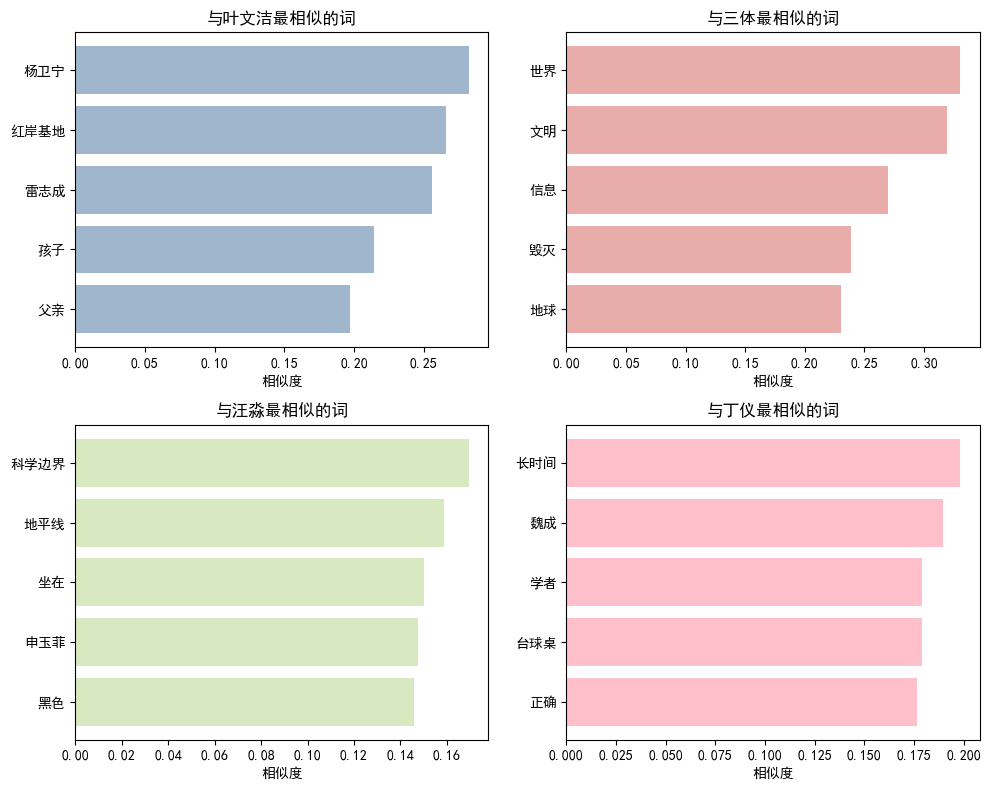

In [34]:
import matplotlib.pyplot as plt

data = {
    '叶文洁': [('杨卫宁', 0.2820843756198883), ('红岸基地', 0.26571476459503174), ('雷志成', 0.2555736005306244), ('孩子', 0.21396596729755402), ('父亲', 0.1972087174654007)],
    '三体': [('世界', 0.33000248670578003), ('文明', 0.31903573870658875), ('信息', 0.2698751986026764), ('毁灭', 0.2389594465494156), ('地球', 0.2299904078245163)],
    '汪淼': [('科学边界', 0.16933922469615936), ('地平线', 0.15894894301891327), ('坐在', 0.1500173807144165), ('申玉菲', 0.14737334847450256), ('黑色', 0.1458636373281479)],
    '丁仪': [('长时间', 0.1980382651090622), ('魏成', 0.1895202249288559), ('学者', 0.17900684475898743), ('台球桌', 0.17873504757881165), ('正确', 0.17649900913238525)]
}

input_words = ['叶文洁', '三体', '汪淼',  '丁仪']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colors = ['#9FB6CD', '#E8ADAA', '#D8E9C2', '#FFC0CB']

for i, input_word in enumerate(input_words):
    row = i // 2
    col = i % 2
    similar_words, similarities = zip(*data[input_word])
    y_pos = range(len(similar_words))

    axs[row, col].barh(y_pos, similarities, align='center', color=colors[i % 4])
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(similar_words)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('相似度')

    axs[row, col].set_title('与{}最相似的词'.format(input_word))

plt.tight_layout()
plt.show()


In [44]:
file_path = 'data/三体/清华大学李军中文褒贬义词典/'

def load_sentiment_dictionary(file_path):
    sentiment_dict = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            word = line.strip()
            sentiment_dict.add(word)
    return sentiment_dict

degrade_dict = load_sentiment_dictionary(file_path + 'degrade.txt')
praise_dict = load_sentiment_dictionary(file_path + 'praise.txt')

import jieba

sentence = "一时间，汪淼感到自己窒息了，不由发出一声低沉的惊叫。面对被惊醒的妻子恐慌的探问，他努力使自己镇定下来，安慰妻子说没什么，又躺回床上，闭上眼睛，在幽灵倒计时的照耀下艰难地度过了剩下的夜晚。"
words = jieba.lcut(sentence)

degrade_score = 0
praise_score = 0

for word in words:
    if word in degrade_dict:
        degrade_score += 1
    if word in praise_dict:
        praise_score += 1

if degrade_score > praise_score:
    sentiment = "负面情感"
elif degrade_score < praise_score:
    sentiment = "正面情感"
else:
    sentiment = "中性情感"

print("正面情感得分为：",praise_score,"负面情感得分为：",degrade_score,"句子情感倾向为：", sentiment)


正面情感得分为： 3 负面情感得分为： 4 句子情感倾向为： 负面情感


In [45]:
file_path = 'data/三体/清华大学李军中文褒贬义词典/'

def load_sentiment_dictionary(file_path):
    sentiment_dict = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            word = line.strip()
            sentiment_dict.add(word)
    return sentiment_dict

degrade_dict = load_sentiment_dictionary(file_path + 'degrade.txt')
praise_dict = load_sentiment_dictionary(file_path + 'praise.txt')

import jieba

sentence = "　　杨母一个人在家，汪淼进去时她正坐在沙发上看书，他这才发现她的眼睛既老花又近视，看书和看远处时都要换戴眼镜。杨母见到汪淼很高兴，说他的气色看上去比上次好多了。"
words = jieba.lcut(sentence)

degrade_score = 0
praise_score = 0

for word in words:
    if word in degrade_dict:
        degrade_score += 1
    if word in praise_dict:
        praise_score += 1

if degrade_score > praise_score:
    sentiment = "负面情感"
elif degrade_score < praise_score:
    sentiment = "正面情感"
else:
    sentiment = "中性情感"

print("正面情感得分为：",praise_score,"负面情感得分为：",degrade_score,"句子情感倾向为：", sentiment)


正面情感得分为： 2 负面情感得分为： 1 句子情感倾向为： 正面情感


In [46]:
file_path = 'data/三体/清华大学李军中文褒贬义词典/'

def load_sentiment_dictionary(file_path):
    sentiment_dict = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            word = line.strip()
            sentiment_dict.add(word)
    return sentiment_dict

degrade_dict = load_sentiment_dictionary(file_path + 'degrade.txt')
praise_dict = load_sentiment_dictionary(file_path + 'praise.txt')

import jieba

sentence = "“不错，它就是一台无线电发射机。”雷政委满意地点点头，“你知道微波炉吗？”"
words = jieba.lcut(sentence)

degrade_score = 0
praise_score = 0

for word in words:
    if word in degrade_dict:
        degrade_score += 1
    if word in praise_dict:
        praise_score += 1

if degrade_score > praise_score:
    sentiment = "负面情感"
elif degrade_score < praise_score:
    sentiment = "正面情感"
else:
    sentiment = "中性情感"

print("正面情感得分为：",praise_score,"负面情感得分为：",degrade_score,"句子情感倾向为：", sentiment)


正面情感得分为： 2 负面情感得分为： 0 句子情感倾向为： 正面情感


#### 25英雄网络

In [9]:
topn = 25
topn_hero = edge_df.groupby(['hero'])[['comic']].count().sort_values(by=['comic'], ascending=False).head(topn).index

h1_ = []; h2_ = []; cnt_ = [];
for comb in list(combinations(topn_hero, 2)):    
    temp1 = set(edge_df[edge_df['hero']==comb[0]]['comic'])
    temp2 = set(edge_df[edge_df['hero']==comb[1]]['comic'])
    cnt = len(temp1.intersection(temp2)) # 两位英雄在其出现的漫画中的交集数量    
    h1_.append(comb[0]); h2_.append(comb[1]); cnt_.append(cnt);
appto_df = pd.DataFrame({'H1':h1_, 'H2':h2_, 'CNT':cnt_})

display(appto_df.head())

,H1,H2,CNT
0,SPIDER-MAN,CAPTAIN AMERICA,145
1,SPIDER-MAN,IRON MAN,95
2,SPIDER-MAN,THING,125
3,SPIDER-MAN,THOR,96
4,SPIDER-MAN,HUMAN TORCH,147


In [20]:

HERO_COLOR = {
    'CAPTAIN AMERICA':'darkblue',
    'IRON MAN':'gold',
    'SPIDER-MAN':'darkred',
    'HULK':'forestgreen',
    'THOR':'lightblue',
    'DR. STRANGE':'purple'
}

# Make network
## Initialize graph
## - https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9
marvel_net = nx.Graph() 
for i, row in appto_df.iterrows():
    marvel_net.add_edge(row['H1'], row['H2'], weight=row['CNT'])  # specify edge data

## - Inference
# aspl = nx.average_shortest_path_length(marvel_net) # no weight
# adgr = sum(dict(marvel_net.degree()).values())/float(len(marvel_net)) # no weight
        
# Visualization
## Get positions for the nodes in network
# pos_ = nx.kamada_kawai_layout(marvel_net) # sample layout : spring_layout ...
pos_ = nx.spring_layout(marvel_net, seed=11)
cent_ = nx.pagerank(marvel_net, weight='weight') # page rank
cent_top = sorted(cent_.items(), key=lambda item: item[1], reverse=True)[:1] # page rank top 1

## Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width):
    return  go.Scatter(x=x, y=y, line=dict(width=width, color='lightgray'), hoverinfo='text', text=([text]), mode='lines')

## For each edge, make an edge_trace, append to list
edge_trace = []
for edge in marvel_net.edges():    
    if marvel_net.edges()[edge]['weight'] > 0:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]
        trace  = make_edge([x0, x1, None], [y0, y1, None], None, width=5*(marvel_net.edges()[edge]['weight']/appto_df['CNT'].max()))
        edge_trace.append(trace)
                
## Make a node trace
node_trace = go.Scatter(x=[], y=[], text=[], textposition="top center", textfont_size=10, mode='markers+text', hoverinfo='none',
                        marker=dict(color=[], size=[], line_width=[], line_color=[]))

## For each node in network, get the position and size and add to the node_trace
for node in marvel_net.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    color = 'gray'
    line_width = 2
    line_color = 'darkgray'
    name_text = node
    
    if node in HERO_COLOR:
        color = HERO_COLOR[node]; line_color='black';
        
    if node in [v[0] for v in cent_top]:
        name_text = '<b>' + node + '</b>'
        
    node_trace['marker']['color'] += tuple([color])
    node_trace['marker']['size'] += tuple([int(400*cent_[node])]) # node size is proportional to page rank
    node_trace['marker']['line_width'] += tuple([line_width])
    node_trace['marker']['line_color'] += tuple([line_color])
    node_trace['text'] += tuple([name_text])
    
    
## Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)

## Create figure
fig = go.Figure(layout = layout)
## Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
fig.add_trace(node_trace)
fig.update_layout(showlegend = False)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.update_layout(title=f"<b>Top {topn} Heroes Network</b>")
fig.show()